### Replication of scanner-generated phase images (Philips Ingenia)

This notebook visually demonstrates that the code contained here generates phase images (from real and imaginary data from a B0 mapping acquisition) matching those generated at the scanner. Magnitude images are also calculated and shown.

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Ensure figures are rendered in the notebook
%matplotlib inline

# Set size of figures
plt.rcParams['figure.figsize'] = [20, 4.5]

In [2]:
# CONSTANTS
DIR_ROOT = os.getcwd()
DIR_DATA = os.path.join(DIR_ROOT, "data")

FILENAMES_ALL = []
FILENAMES_ALL.append(['01001__B0_map_expiration_volume_2DMS_product_auto_e1_real.nii.gz',
                      '01001__B0_map_expiration_volume_2DMS_product_auto_e1_imaginary.nii.gz',
                      '01001__B0_map_expiration_volume_2DMS_product_auto_e1.nii.gz',
                      '01001__B0_map_expiration_volume_2DMS_product_auto_e1_ph.nii.gz'])
FILENAMES_ALL.append(['01001__B0_map_expiration_volume_2DMS_product_auto_e2_real.nii.gz',
                      '01001__B0_map_expiration_volume_2DMS_product_auto_e2_imaginary.nii.gz',
                      '01001__B0_map_expiration_volume_2DMS_product_auto_e2.nii.gz',
                      '01001__B0_map_expiration_volume_2DMS_product_auto_e2_ph.nii.gz'])
FILENAMES_ALL.append(['01101__B0_map_expiration_volume_2DMS_product_auto_e1_real.nii.gz',
                      '01101__B0_map_expiration_volume_2DMS_product_auto_e1_imaginary.nii.gz',
                      '01101__B0_map_expiration_volume_2DMS_product_auto_e1.nii.gz',
                      '01101__B0_map_expiration_volume_2DMS_product_auto_e1_ph.nii.gz'])
FILENAMES_ALL.append(['01101__B0_map_expiration_volume_2DMS_product_auto_e2_real.nii.gz',
                      '01101__B0_map_expiration_volume_2DMS_product_auto_e2_imaginary.nii.gz',
                      '01101__B0_map_expiration_volume_2DMS_product_auto_e2.nii.gz',
                      '01101__B0_map_expiration_volume_2DMS_product_auto_e2_ph.nii.gz'])
FILENAMES_ALL.append(['01301__B0_map_expiration_volume_2DMS_product_auto_e1_real.nii.gz',
                      '01301__B0_map_expiration_volume_2DMS_product_auto_e1_imaginary.nii.gz',
                      '01301__B0_map_expiration_volume_2DMS_product_auto_e1.nii.gz',
                      '01301__B0_map_expiration_volume_2DMS_product_auto_e1_ph.nii.gz'])
FILENAMES_ALL.append(['01301__B0_map_expiration_volume_2DMS_product_auto_e2_real.nii.gz',
                      '01301__B0_map_expiration_volume_2DMS_product_auto_e2_imaginary.nii.gz',
                      '01301__B0_map_expiration_volume_2DMS_product_auto_e2.nii.gz',
                      '01301__B0_map_expiration_volume_2DMS_product_auto_e2_ph.nii.gz'])

SUPTITLES = []
SUPTITLES.append('10) B0 with R/I/M/P saved – default shim - echo 1/2')
SUPTITLES.append('10) B0 with R/I/M/P saved – default shim - echo 2/2')
SUPTITLES.append('11) B0 with R/I/M/P saved – volume shim over kidneys - echo 1/2')
SUPTITLES.append('11) B0 with R/I/M/P saved – volume shim over kidneys - echo 2/2')
SUPTITLES.append('13) B0 with R/I/M/P saved – volume shim over lungs - echo 1/2')
SUPTITLES.append('13) B0 with R/I/M/P saved – volume shim over lungs - echo 2/2')

SLICE_TO_SHOW = 4

In [3]:
class PhilipsB0ValidatePhaseCalculation():
    """Class for visually validating calculation of phase data from real and
    imaginary data (typically from B0 acquisitions)

    Parameters
    ----------
    dir_data : string
        directory containing NIfTI data
    filenames : list
        list of length 4, containing the file names for 4 NIfTI files,
        corresponding to [real, imaginary, magnitude, phase] data

    Notes
    --------
    []

    """
    def __init__(self, dir_data, filenames):
        """Constructor for PhilipsB0ValidatePhaseCalculation class

        """
        filepaths = [os.path.join(dir_data, filename) for filename in filenames]

        [self.real_path, self.imaginary_path,
         self.magnitude_path, self.phase_path] = filepaths

        self.load_data()
        self.ri_to_mp()

    def load_data(self):
        """Load NIfTI files into numpy arrays

        """
        self.real = nib.load(self.real_path).get_fdata()
        self.imaginary = nib.load(self.imaginary_path).get_fdata()
        self.magnitude = nib.load(self.magnitude_path).get_fdata()
        self.phase = nib.load(self.phase_path).get_fdata()

        return self


    def ri_to_mp(self):
        """Convert real and imaginary to magnitude and phase

        """
        self.magnitude_calculated = np.sqrt(self.real**2 + self.imaginary**2)
        self.phase_calculated = np.arctan2(self.imaginary, self.real)

        return self

    def plot(self, slice_to_show, suptitle):
        """Display plot with montage to visually compare magnitude and phase
        calculated at the scanner with those calculated in this class

        """
        images = []
        images.append(self.magnitude[:, :, slice_to_show])
        images.append(self.magnitude_calculated[:, :, slice_to_show])
        images.append(self.phase[:, :, slice_to_show])
        images.append(self.phase_calculated[:, :, slice_to_show])

        titles = ['magnitude (scanner)', 'magnitude (calculated)',
                  'phase (scanner)', 'phase (calculated)']

        fig, axes = plt.subplots(1, 4)
        for ax, image, title in zip(axes.flat, images, titles):
            im = ax.imshow(image, cmap='gray')
            ax.set_title(title)
            ax.axis('off')
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="2%", pad=0.05)
            plt.colorbar(im, cax=cax)

        fig.suptitle(f"{suptitle} - slice {slice_to_show}")
        plt.show()
        
        

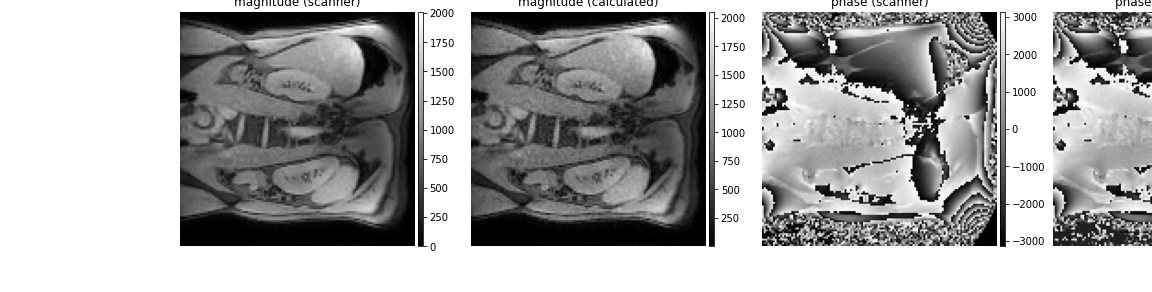

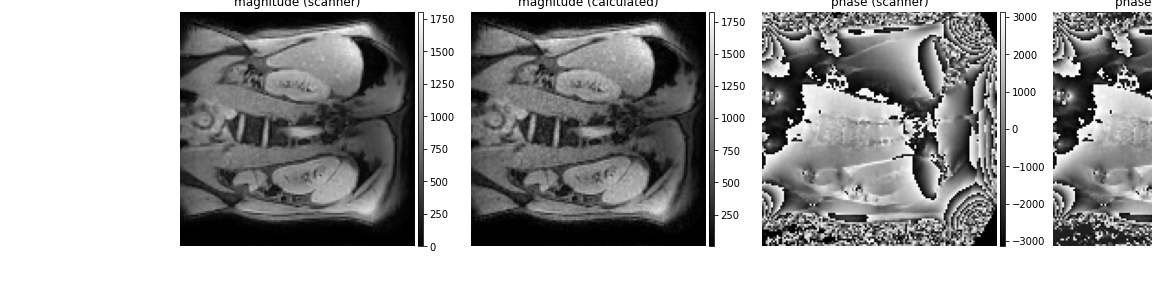

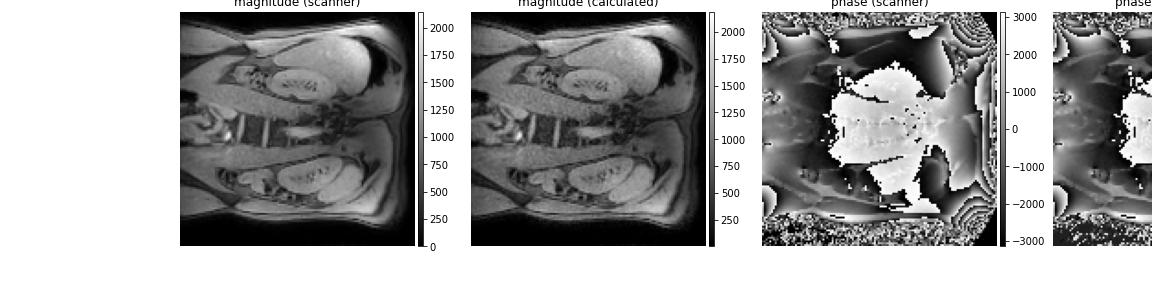

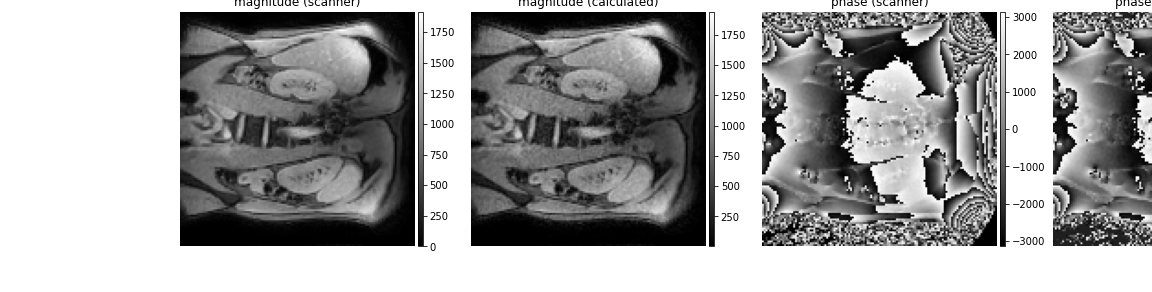

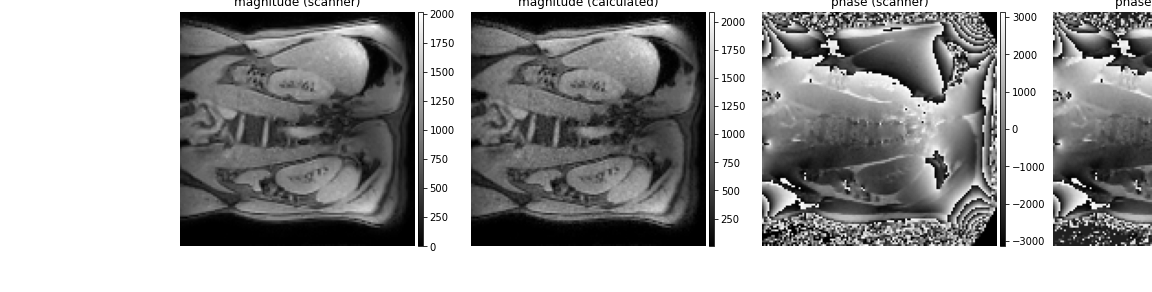

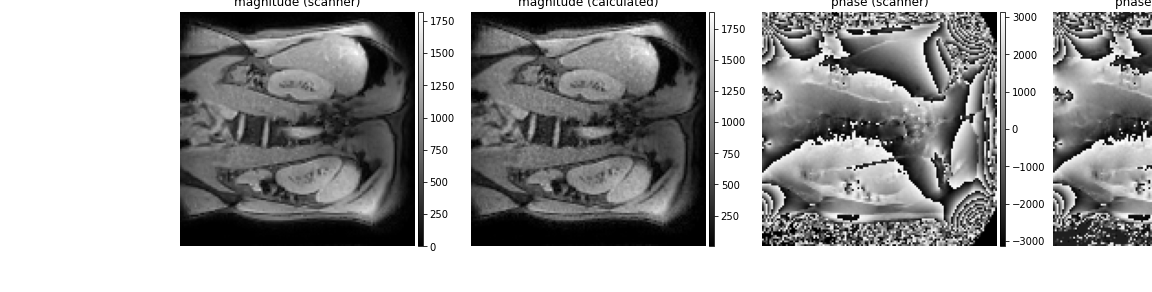

In [4]:
for filenames, suptitle in zip(FILENAMES_ALL, SUPTITLES):
    Test = PhilipsB0ValidatePhaseCalculation(DIR_DATA, filenames)
    Test.plot(SLICE_TO_SHOW, suptitle)